In [1]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [3]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [4]:
anatweets = get_all_tweets("@lapatina_")

...400 tweets downloaded so far
...599 tweets downloaded so far
...799 tweets downloaded so far
...999 tweets downloaded so far
...1199 tweets downloaded so far
...1399 tweets downloaded so far
...1599 tweets downloaded so far
...1799 tweets downloaded so far
...1999 tweets downloaded so far
...2199 tweets downloaded so far
...2399 tweets downloaded so far
...2598 tweets downloaded so far
...2798 tweets downloaded so far
...2997 tweets downloaded so far
...3173 tweets downloaded so far
...3173 tweets downloaded so far


In [5]:
#overview of ana tweets
anatweets.head()

time                 name totaltweets  \
0  2022-05-01 07:33:35+00:00  Anastasiia Lapatina        3176   
1  2022-04-30 13:08:21+00:00  Anastasiia Lapatina        3176   
2  2022-04-28 18:10:15+00:00  Anastasiia Lapatina        3176   
3  2022-04-28 17:18:19+00:00  Anastasiia Lapatina        3176   
4  2022-04-28 12:27:16+00:00  Anastasiia Lapatina        3176   

                                                                     description  \
0  Ukrainian journalist @KyivIndependent | Bylines: NYT, The Guardian, Kyiv Post   
1  Ukrainian journalist @KyivIndependent | Bylines: NYT, The Guardian, Kyiv Post   
2  Ukrainian journalist @KyivIndependent | Bylines: NYT, The Guardian, Kyiv Post   
3  Ukrainian journalist @KyivIndependent | Bylines: NYT, The Guardian, Kyiv Post   
4  Ukrainian journalist @KyivIndependent | Bylines: NYT, The Guardian, Kyiv Post   

  hashtags  \
0       []   
1       []   
2       []   
3       []   
4       []   

                                                                                                                                          user_mentions  \
0             [{'screen_name': 'mrsorokaa', 'name': 'Oleksiy Sorokin', 'id': 1091409575343992832, 'id_str': '1091409575343992832', 'indices': [0, 10]}]   
1  [{'screen_name': 'KyivIndependent', 'name': 'The Kyiv Independent', 'id': 1462548977367359490, 'id_str': '1462548977367359490', 'indices': [3, 19]}]   
2                                                                                                                                                    []   
3                                                                                                                                                    []   
4                                                                                                                                                    []   

  favorite_count lang following followers_count retweet_count retweeted  \
0            276   en       502          638135            16     False   
1              0   en       502          638135          4832     False   
2           4593   en       502          638135          1184     False   
3           8469   en       502          638135          1762     False   
4           2395   en       502          638135           474     False   

                                                                                                                                             text  \
0                                                                                                                         @mrsorokaa “Stopped by”   
1  RT @KyivIndependent: ⚡️ Actress and filmmaker Angelina Jolie was spotted at a cafe in western Ukrainian city of Lviv on April 30. \n\nJolie i…   
2     Russian missiles hit Kyiv –– an infrastructure object, as well as a residential complex near it were damaged. More… https://t.co/I9JpVuitgv   
3                                                                 Explosions reported in Kyiv, clouds of smoke are seen in the centre of the city   
4    One of Ukraine’s most famous comedians did his first stand up in English. He is collecting donations for our milita… https://t.co/nqCZmiZPMu   

        location  
0  Lviv, Ukraine  
1  Lviv, Ukraine  
2  Lviv, Ukraine  
3  Lviv, Ukraine  
4  Lviv, Ukraine

In [6]:
anatweets.describe(exclude='number')

time                 name totaltweets  \
count                        3173                 3173        3173   
unique                       3158                    1           1   
top     2021-11-21 10:51:17+00:00  Anastasiia Lapatina        3176   
freq                            3                 3173        3173   

                                                                          description  \
count                                                                            3173   
unique                                                                              1   
top     Ukrainian journalist @KyivIndependent | Bylines: NYT, The Guardian, Kyiv Post   
freq                                                                             3173   

       hashtags user_mentions favorite_count  lang following followers_count  \
count      3173          3173           3173  3173      3173            3173   
unique      422           861            844    25         1               3   
top          []            []              0    en       502          638135   
freq       2711          1405           1170  2822      3173            2598   

       retweet_count retweeted                 text       location  
count           3173      3173                 3173           3173  
unique          1009         1                 3171              1  
top                0     False  📸Crimean Solidarity  Lviv, Ukraine  
freq             591      3173                    3           3173

In [7]:
anatweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3173 non-null   object
 1   name             3173 non-null   object
 2   totaltweets      3173 non-null   object
 3   description      3173 non-null   object
 4   hashtags         3173 non-null   object
 5   user_mentions    3173 non-null   object
 6   favorite_count   3173 non-null   object
 7   lang             3173 non-null   object
 8   following        3173 non-null   object
 9   followers_count  3173 non-null   object
 10  retweet_count    3173 non-null   object
 11  retweeted        3173 non-null   object
 12  text             3173 non-null   object
 13  location         3173 non-null   object
dtypes: object(14)
memory usage: 347.2+ KB


In [8]:
#measuring hashtahs
anatweets['hashtags'].value_counts().loc[lambda x : x>=3].to_frame()

hashtags
[]                                             2711
[{'text': 'Russia', 'indices': [0, 7]}]           6
[{'text': 'Ukraine', 'indices': [0, 8]}]          4
[{'text': 'Russia', 'indices': [20, 27]}]         3
[{'text': 'Russia', 'indices': [17, 24]}]         3

In [9]:
#display the most user mentions
anatweets['user_mentions'].value_counts().loc[lambda x : x>20].to_frame()

user_mentions
[]                                                                                                                                                             1405
[{'screen_name': 'KyivIndependent', 'name': 'The Kyiv Independent', 'id': 1462548977367359490, 'id_str': '1462548977367359490', 'indices': [3, 19]}]            129
[{'screen_name': 'IAPonomarenko', 'name': 'Illia Ponomarenko 🇺🇦', 'id': 262219168, 'id_str': '262219168', 'indices': [3, 17]}]                                   66
[{'screen_name': 'olgatokariuk', 'name': 'Olga Tokariuk', 'id': 1359532099, 'id_str': '1359532099', 'indices': [3, 16]}]                                         40
[{'screen_name': 'mrsorokaa', 'name': 'Oleksiy Sorokin', 'id': 1091409575343992832, 'id_str': '1091409575343992832', 'indices': [3, 13]}]                        39
[{'screen_name': 'olya_rudenko', 'name': 'Olga Rudenko', 'id': 307562004, 'id_str': '307562004', 'indices': [3, 16]}]                                            32
[{'screen_name': 'AlexKhrebet', 'name': 'Alexander Khrebet/Олександр Хребет', 'id': 86302370, 'id_str': '86302370', 'indices': [3, 15]}]                         27
[{'screen_name': 'nolanwpeterson', 'name': 'Nolan Peterson', 'id': 21976616, 'id_str': '21976616', 'indices': [3, 18]}]                                          25
[{'screen_name': 'PaulNiland', 'name': 'Paul Niland', 'id': 86327801, 'id_str': '86327801', 'indices': [0, 11]}]                                                 23

In [50]:
#which tweet got the most retweets
print(anatweets ['retweet_count'].max())
anatweets.loc[anatweets ['retweet_count'] == anatweets ['retweet_count'].max()]['text']

141796


1978    RT @Ukraine: https://t.co/bBtsdr7wmX
Name: text, dtype: object

In [49]:
#which tweet got the most likes
print(anatweets ['favorite_count'].max())
anatweets .loc[anatweets ['favorite_count'] == mask]['text']

682573


795    A Russian soldier surrendered. Ukrainians gave him tea, food, and let him call his mother on video. I want to cry f… https://t.co/AJiYadigVv
Name: text, dtype: object

In [12]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [13]:
anatweets  = get_sentiment_scores(anatweets ,'text')
tweet_sentiment = anatweets [['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [14]:
tweet_sentiment.head()

text  \
0                                                                                                                         @mrsorokaa “Stopped by”   
1  RT @KyivIndependent: ⚡️ Actress and filmmaker Angelina Jolie was spotted at a cafe in western Ukrainian city of Lviv on April 30. \n\nJolie i…   
2     Russian missiles hit Kyiv –– an infrastructure object, as well as a residential complex near it were damaged. More… https://t.co/I9JpVuitgv   
3                                                                 Explosions reported in Kyiv, clouds of smoke are seen in the centre of the city   
4    One of Ukraine’s most famous comedians did his first stand up in English. He is collecting donations for our milita… https://t.co/nqCZmiZPMu   

   text Positive Sentiment Score  text Negative Sentiment Score  
0                          0.000                          0.000  
1                          0.000                          0.000  
2                          0.095                          0.132  
3                          0.000                          0.000  
4                          0.110                          0.000

In [15]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.807, Tweet: @RayhanAsat Beautiful!
Score: 0.807, Tweet: @sahraakarimi Congratulations!
Score: 0.804, Tweet: Wow! https://t.co/j0isD2QKFK
Score: 0.804, Tweet: Amazing! https://t.co/I2SDW7GdGc
Score: 0.804, Tweet: Wow! https://t.co/zwMfSkGOe9
Score: 0.796, Tweet: Beautiful https://t.co/PeZLnJoMQA
Score: 0.796, Tweet: Beautiful. https://t.co/0WzurdcDUv
Score: 0.796, Tweet: @rommari Wow! Congrats, Maria!
Score: 0.792, Tweet: @avalaina 💔 Amazing, amazing news
Score: 0.792, Tweet: Wow 
https://t.co/YC7ClVNf49


In [16]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.697, Tweet: Soviet hell https://t.co/R8aFfxcWTB
Score: 0.659, Tweet: RT @BSBonner: No shit, Sherlock.
Score: 0.655, Tweet: Betrayal. #NordStream2 https://t.co/AJ3sxYT5Kv
Score: 0.649, Tweet: @chitowntoktown …dictatorial insanity.
Score: 0.64, Tweet: Life will defeat death, and light – darkness. https://t.co/tLGdDT9vi4
Score: 0.636, Tweet: @olliecarroll Seven people dead, 22 injured.
Score: 0.636, Tweet: Ukrainian casualties: 137 dead, 316 injured.
Score: 0.636, Tweet: @olgatokariuk What a bastard.
Score: 0.63, Tweet: seriously? https://t.co/n5HfrNPEZC
Score: 0.619, Tweet: This is horribly wrong, @Reuters https://t.co/o1UkktSAzD


In [17]:
anatweets ['retweet_count']= anatweets ['retweet_count'].astype('int64')
anatweets ['favorite_count']= anatweets ['favorite_count'].astype('int64')

In [18]:
features= anatweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

retweet_count  favorite_count  \
retweet_count                       1.000000        0.484903   
favorite_count                      0.484903        1.000000   
text Positive Sentiment Score      -0.047218       -0.005142   
text Negative Sentiment Score       0.032264        0.040462   

                               text Positive Sentiment Score  \
retweet_count                                      -0.047218   
favorite_count                                     -0.005142   
text Positive Sentiment Score                       1.000000   
text Negative Sentiment Score                      -0.193750   

                               text Negative Sentiment Score  
retweet_count                                       0.032264  
favorite_count                                      0.040462  
text Positive Sentiment Score                      -0.193750  
text Negative Sentiment Score                       1.000000

<AxesSubplot:>

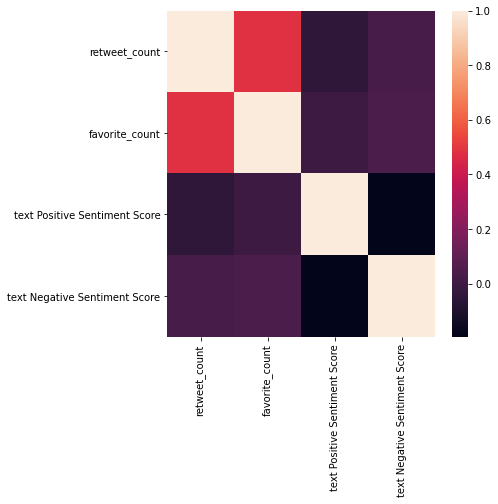

In [19]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [20]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [21]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [22]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-22-2ade89cc017e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)
<ipython-input-22-2ade89cc017e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)
<ipython-input-22-2ade89cc017e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [23]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-23-3e2f8e3d0251>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)
<ipython-input-23-3e2f8e3d0251>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)


0                                                                                 “stopped by”
1      : ⚡️ actress filmmaker angelina jolie spotted cafe western city lviv april 30. jolie i…
2    n missile hit kyiv –– infrastructure object, well residential complex near damaged. more…
3                                          explosion repoed kyiv, cloud smoke seen centre city
4                      one ’s famous comedian first stand english. collecting donation milita…
Name: clean_lemmatized, dtype: object

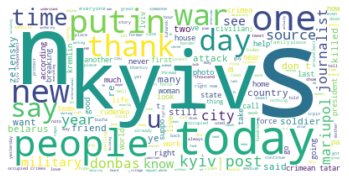

In [24]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

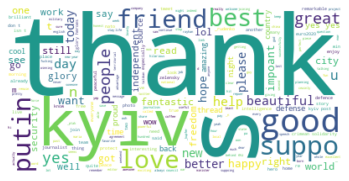

In [25]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

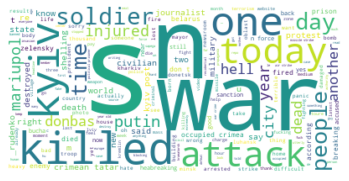

In [26]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [27]:
#retweets distribution over time
fig = px.line(anatweets, x="time", y= anatweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [28]:
df=anatweets [['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=anatweets [['time', 'retweet_count','text Positive Sentiment Score']]
neg =anatweets [['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

time  retweet_count  text Positive Sentiment Score  \
288  2022-03-31 23:38:45+00:00           8420                          0.000   
289  2022-03-31 23:04:43+00:00            726                          0.000   
290  2022-03-31 20:55:54+00:00            133                          0.000   
291  2022-03-31 19:19:27+00:00            850                          0.000   
292  2022-03-31 17:31:51+00:00          12662                          0.110   
..                         ...            ...                            ...   
822  2022-03-01 06:58:15+00:00           7765                          0.236   
823  2022-03-01 06:53:51+00:00           6845                          0.180   
824  2022-03-01 06:53:45+00:00           1930                          0.000   
825  2022-03-01 00:29:01+00:00            132                          0.420   
826  2022-03-01 00:12:54+00:00              0                          0.000   

     text Negative Sentiment Score  
288                          0.000  
289                          0.079  
290                          0.000  
291                          0.000  
292                          0.000  
..                             ...  
822                          0.230  
823                          0.000  
824                          0.073  
825                          0.000  
826                          0.000  

[539 rows x 4 columns]

In [29]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [31]:

anatweets["is_viral"] = anatweets.retweet_count.apply(
    lambda row: 1 if row >= anatweets.retweet_count.mean()  else 0)

print(anatweets.is_viral.value_counts())

0    2676
1     497
Name: is_viral, dtype: int64


In [32]:
anatweets['tweet_length'] = anatweets.apply(lambda tweet: len(tweet['text']), axis=1)
anatweets["followers_count"] = anatweets.apply(lambda tweet: tweet["followers_count"], axis=1)
anatweets["friends_count"] = anatweets.apply(lambda tweet: tweet["following"], axis=1)

anatweets["hashtag_count"] = anatweets.apply(lambda tweet: tweet.text.count("#"), axis=1)
anatweets["link_count"] = anatweets.apply(lambda tweet: tweet.text.count("http"), axis=1)
anatweets["word_count"] = anatweets.apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

anatweets["avg_length_of_words"] = anatweets.text.apply(find_avg_word_length)

In [33]:


labels = anatweets[["is_viral"]]
features = anatweets[["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = anatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = anatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                         23
followers_count                  638135
friends_count                       502
text Positive Sentiment Score       0.0
text Negative Sentiment Score       0.0
Name: 0, dtype: object
[-1.81158459  0.1306607   0.         -0.60005321 -0.61084192]


In [34]:

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [35]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8771653543307086

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

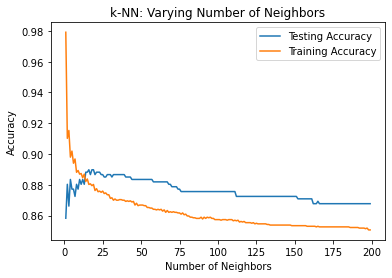

In [36]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [37]:
best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

16
0.889763779527559


In [51]:
anatweets.to_csv('anatweets')